In [1]:
import torch
import torch.optim as optim
import numpy as np

In [2]:
input_size = 4
hidden_size = 2

In [3]:
# one-hot encodding
h = [1, 0, 0, 0]
e = [0, 1, 0, 0]
l = [0, 0, 1, 0]
o = [0, 0, 0, 1]
input_data_np = np.array([[h, e, l, l, o],
                           [e, o, l, l, l],
                           [l, l, e, e, l]], dtype=np.float32)

In [4]:
# transform as torch tensor
input_data = torch.Tensor(input_data_np)

In [5]:
# declare RNN
rnn = torch.nn.RNN(input_size, hidden_size)

In [6]:
outputs, _status = rnn(input_data)
print(outputs)
print(outputs.size)

tensor([[[ 0.8810,  0.7214],
         [ 0.7921,  0.5653],
         [ 0.4716,  0.5663],
         [ 0.4716,  0.5663],
         [ 0.9255, -0.0376]],

        [[ 0.3839, -0.1119],
         [ 0.7916, -0.5840],
         [ 0.0352,  0.1385],
         [ 0.0352,  0.1385],
         [ 0.3118,  0.2829]],

        [[ 0.4590,  0.5002],
         [ 0.6097,  0.5695],
         [ 0.7526,  0.5004],
         [ 0.7526,  0.5004],
         [ 0.2508,  0.3455]]], grad_fn=<StackBackward>)
<built-in method size of Tensor object at 0x7f97a9e51cd0>


Hihello example  
'H','i','h','e','l','l','o'를 순차적으로 예측 

In [7]:
# one-hot encoding

# list of available characters
char_set = ['h','i','e','l','o']
x_data = [[0, 1, 0, 2, 3, 3]]

# data setting
# hihell 까지만 input, o가 output이므로 o가 제외됨.
x_one_hot = [[[1, 0, 0, 0, 0],
              [0, 1, 0, 0, 0],
              [1, 0, 0, 0, 0],
              [0, 0, 1, 0, 0],
              [0, 0, 0, 1, 0],
              [0, 0, 0, 1, 0]]]
y_data = [[1, 0, 2, 3, 3, 4]]

In [8]:
# hyper parameters
input_size = len(char_set)
hidden_size = len(char_set)
learning_rate = 0.1

In [9]:
# transform as torch tensor variable
X = torch.FloatTensor(x_one_hot)
Y = torch.LongTensor(y_data)

In [10]:
# declare RNN
# batch_first guarantees the order of output = (B, S, F)
rnn = torch.nn.RNN(input_size, hidden_size, batch_first=True)

In [11]:
# loss & optimizer setting
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(rnn.parameters(), learning_rate)

In [12]:
# start training
for i in range(100):
    optimizer.zero_grad()
    outputs, _status = rnn(X)
    loss = criterion(outputs.view(-1, input_size), Y.view(-1))
    loss.backward()
    optimizer.step()
    
    result = outputs.data.numpy().argmax(axis=2)
    result_str = ''.join([char_set[c] for c in np.squeeze(result)])
    print(i, 'loss: ', loss.item(), 'prediction: ', result, 
          'true Y: ', y_data, 'prediction_str: ', result_str)

0 loss:  1.9214973449707031 prediction:  [[2 1 2 2 0 0]] true Y:  [[1, 0, 2, 3, 3, 4]] prediction_str:  eieehh
1 loss:  1.7136880159378052 prediction:  [[2 1 4 4 4 1]] true Y:  [[1, 0, 2, 3, 3, 4]] prediction_str:  eioooi
2 loss:  1.5266627073287964 prediction:  [[2 1 2 4 4 4]] true Y:  [[1, 0, 2, 3, 3, 4]] prediction_str:  eieooo
3 loss:  1.3623462915420532 prediction:  [[2 1 2 3 4 4]] true Y:  [[1, 0, 2, 3, 3, 4]] prediction_str:  eieloo
4 loss:  1.2477024793624878 prediction:  [[2 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]] prediction_str:  ehello
5 loss:  1.1417827606201172 prediction:  [[2 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]] prediction_str:  ehello
6 loss:  1.0423825979232788 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]] prediction_str:  ihello
7 loss:  0.9706668257713318 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]] prediction_str:  ihello
8 loss:  0.9190327525138855 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]] prediction_str:  ihello
9

87 loss:  0.4654809534549713 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]] prediction_str:  ihello
88 loss:  0.4652944803237915 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]] prediction_str:  ihello
89 loss:  0.4651161730289459 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]] prediction_str:  ihello
90 loss:  0.46493974328041077 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]] prediction_str:  ihello
91 loss:  0.4647655189037323 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]] prediction_str:  ihello
92 loss:  0.46459659934043884 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]] prediction_str:  ihello
93 loss:  0.46442607045173645 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]] prediction_str:  ihello
94 loss:  0.4642610549926758 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]] prediction_str:  ihello
95 loss:  0.46409568190574646 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]] prediction_s

charseq example

In [13]:
import torch
import torch.optim as optim
import numpy as np

In [14]:
sample = " if you want you"

In [15]:
#make dictionary
char_set = list(set(sample))
char_dic = {c: i for i, c in enumerate(char_set)}
print(char_dic)

{'o': 0, 'u': 1, 't': 2, 'y': 3, 'n': 4, 'f': 5, 'w': 6, 'a': 7, ' ': 8, 'i': 9}


In [16]:
#hyper parameters
dic_size = len(char_dic)
hidden_size = len(char_dic)
learning_rate = 0.1

In [17]:
# data setting
sample_idx = [char_dic[c] for c in sample]
x_data = [sample_idx[:-1]]
x_one_hot = [np.eye(dic_size)[x] for x in x_data]
y_data = [sample_idx[1:]]

In [18]:
# transform as torch tensor variable
X = torch.FloatTensor(x_one_hot)
Y = torch.LongTensor(y_data)

In [19]:
# declare RNN
# batch_first guarantees the order of output = (B, S, F)
rnn = torch.nn.RNN(dic_size, hidden_size, batch_first=True)

In [20]:
# loss & optimizer setting
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(rnn.parameters(), learning_rate)

In [21]:
# start training
for i in range(50):
    optimizer.zero_grad()
    outputs, _status = rnn(X)
    loss = criterion(outputs.view(-1, dic_size), Y.view(-1))
    loss.backward()
    optimizer.step()
    result = outputs.data.numpy().argmax(axis=2)
    result_str = ''.join([char_set[c] for c in np.squeeze(result)])
    print(i, 'loss: ', loss.item(), 'prediction: ', result, 
          "true Y: ", y_data, "prediction str: ", result_str)

0 loss:  2.372743844985962 prediction:  [[0 0 7 8 0 0 5 0 5 0 0 0 0 0 0]] true Y:  [[9, 5, 8, 3, 0, 1, 8, 6, 7, 4, 2, 8, 3, 0, 1]] prediction str:  ooa oofofoooooo
1 loss:  2.0390493869781494 prediction:  [[8 0 8 8 0 1 8 0 7 1 1 8 8 0 1]] true Y:  [[9, 5, 8, 3, 0, 1, 8, 6, 7, 4, 2, 8, 3, 0, 1]] prediction str:   o  ou oauu  ou
2 loss:  1.7754647731781006 prediction:  [[8 5 8 3 0 1 8 6 7 1 2 8 8 0 1]] true Y:  [[9, 5, 8, 3, 0, 1, 8, 6, 7, 4, 2, 8, 3, 0, 1]] prediction str:   f you waut  ou
3 loss:  1.5837836265563965 prediction:  [[8 5 8 3 0 1 8 6 7 1 2 8 3 0 1]] true Y:  [[9, 5, 8, 3, 0, 1, 8, 6, 7, 4, 2, 8, 3, 0, 1]] prediction str:   f you waut you
4 loss:  1.456066608428955 prediction:  [[8 5 8 3 0 1 8 6 7 3 2 8 3 0 1]] true Y:  [[9, 5, 8, 3, 0, 1, 8, 6, 7, 4, 2, 8, 3, 0, 1]] prediction str:   f you wayt you
5 loss:  1.3734009265899658 prediction:  [[8 5 8 3 0 1 8 6 7 4 2 8 3 0 1]] true Y:  [[9, 5, 8, 3, 0, 1, 8, 6, 7, 4, 2, 8, 3, 0, 1]] prediction str:   f you want you
6 loss:  1.2

Long Sequence

In [22]:
import torch
import torch.optim as optim
import numpy as np

In [23]:
# Random seed to make results deterministic and reproducible
torch.manual_seed(0)

In [24]:
sentence = ("if you want to build a ship, don't drum up people together to "
            "collect wood and don't assign them tasks and work, but rather "
            "teach them to long for the endless immensity of the sea.")

In [25]:
# make dictionary
char_set = list(set(sentence))
char_dic = {c : i for i, c in enumerate(char_set)}

In [26]:
# hyper parameters
dic_size = len(char_dic)
hidden_size = len(char_dic)
sequence_length = 10 # Any arbitrary number
learning_rate = 0.1

In [27]:
# data setting
x_data = []
y_data = []

for i in range(0, len(sentence) - sequence_length):
    x_str = sentence[i : i + sequence_length]
    y_str = sentence[i+1 : i + sequence_length + 1]
    print(i, x_str, '->', y_str)
    
    x_data.append([char_dic[c] for c in x_str])
    y_data.append([char_dic[c] for c in y_str])
    
x_one_hot = [np.eye(dic_size)[x] for x in x_data]

0 if you wan -> f you want
1 f you want ->  you want 
2  you want  -> you want t
3 you want t -> ou want to
4 ou want to -> u want to 
5 u want to  ->  want to b
6  want to b -> want to bu
7 want to bu -> ant to bui
8 ant to bui -> nt to buil
9 nt to buil -> t to build
10 t to build ->  to build 
11  to build  -> to build a
12 to build a -> o build a 
13 o build a  ->  build a s
14  build a s -> build a sh
15 build a sh -> uild a shi
16 uild a shi -> ild a ship
17 ild a ship -> ld a ship,
18 ld a ship, -> d a ship, 
19 d a ship,  ->  a ship, d
20  a ship, d -> a ship, do
21 a ship, do ->  ship, don
22  ship, don -> ship, don'
23 ship, don' -> hip, don't
24 hip, don't -> ip, don't 
25 ip, don't  -> p, don't d
26 p, don't d -> , don't dr
27 , don't dr ->  don't dru
28  don't dru -> don't drum
29 don't drum -> on't drum 
30 on't drum  -> n't drum u
31 n't drum u -> 't drum up
32 't drum up -> t drum up 
33 t drum up  ->  drum up p
34  drum up p -> drum up pe
35 drum up pe -> rum up peo
36

In [28]:
# transform as torch tensor variable
X = torch.FloatTensor(x_one_hot)
Y = torch.LongTensor(y_data)

In [29]:
# declare RNN + FC
class Net(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, layers):
        super(Net, self).__init__()
        self.rnn = torch.nn.RNN(
            input_dim, hidden_dim, num_layers=layers, batch_first=True)
        self.fc = torch.nn.Linear(hidden_dim, hidden_dim, bias=True)
        
    def forward(self, x):
        x, _status = self.rnn(x)
        x = self.fc(x)
        return x

In [30]:
net = Net(dic_size, hidden_size, 2)

In [31]:
# loss & optimizer setting
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), learning_rate)

In [32]:
# start training
for i in range(100):
    optimizer.zero_grad()
    outputs = net(X)
    loss = criterion(outputs.view(-1, dic_size), Y.view(-1))
    loss.backward()
    optimizer.step()
    
    results = outputs.argmax(dim=2)
    predict_str = ''
    for j, result in enumerate(results):
        #print(i, j, ''.join([char_set[t] for t in result]), loss.item())
        if j == 0:
            predict_str += ''.join([char_set[t] for t in result])
        else:
            predict_str += char_set[result[-1]]
    
    print(predict_str)

'iiiieeeiieewieeiieeeeieaieieeieeaewia'ei'e'iaeiaawiaeaeaaeiieeiaiiaiaiiaeaiiaewieeaeeiaiiiawiaeeiieaeiiiaeiiaaieeiweaieeaaeiiaeaaiiaeeiieiieeewiae'iaaeiaiiaaaiweeieiiaeiwiwiaaeia
                                                                                                                                                                                   
ootototot ototottot tot t   totototo totottot  t dot todr tot tt to ttoto tod tot totto tt todr toto otto tot tototototodrototsottotr totoot tootototr t  tostootot sootto totrdtod
ocb ucu uct cb ec. ya  cec.culuct u t ycnolycu yc  pcu .c.algctcy.e c  elyc.yl cu t u u uctc ccagcy   ycu ucu t u t ucu uc.  uct y tcylcbloc.bglc tcu t u tcy  c. acy  y' cy ucu rc
  a t t thi  t e e i  t t t t i t t t iw  s  i s   d t e i  sht i s is e ths ie tht t i i s i  iysa   t s t t t thi t i t i    t t t ihs  ehs s e   e t s i i i s t i i rtit t t t 
  d e      e er i e e       d s     d  d e     e   s e  t   e  a  d  s e  t e e     e s  d   e  ther

t you want to build a ship, don't drum up people together to collect wood and don't assign them tasks and work, but rather teach them to long for the endless immensity of the seac
l you want to build a ship, don't drum up people together to collect wood and don't assign them tasks and work, but rather teach them to long for the endless immensity of the seac
g you want to build a ship, don't drum up people together to collect wood and don't assign them tasks and work, but rather teach them to long for the endless immensity of the seac
t you want to build a ship, don't drum up people together to collect wood and don't assign them tasks and work, but rather teach them to long for the endless immensity of the sea.
t you want to build a ship, don't drum up people together to collect wood and don't assign them tasks and work, but rather teach them to long for the endless immensity of the sea.
t you want to build a ship, don't drum up people together to collect wood and don't assign them task

p you want to build a ship, don't drum up people together to collect wood and don't assign them tasks and work, but rather teach them to long for the endless immensity of the sea.
p you want to build a ship, don't drum up people together to collect wood and don't assign them tasks and work, but rather teach them to long for the endless immensity of the sea.


Time Series

In [33]:
import torch
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [34]:
# Random seed to make results deterministic and reproducible
torch.manual_seed(0)

In [35]:
# scaling function for input data
def minmax_scaler(data):
    numerate = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    return numerate / (denominator + 1e-7)

In [36]:
# make dataset to input
def build_dataset(time_series, seq_length):
    dataX = []
    dataY = []
    for i in range(0, len(time_series) - seq_length):
        _x = time_series[i : i + seq_length, :]
        _y = time_series[i + seq_length, [-1]]
        print(_x, '->', _y)
        dataX.append(_x)
        dataY.append(_y)
    return np.array(dataX), np.array(dataY)

In [37]:
# hyper parameters
seq_length = 7
data_dim = 6
hidden_dim = 10
output_dim = 1
learninig_rate = 0.01
iterations = 500

In [38]:
# load data
xy = np.loadtxt('data-02-stock_daily.csv', delimiter=',')
xy = xy[::-1] # reverse order

# split train-test set
train_size = int(len(xy) * 0.7)
train_set = xy[0:train_size]
test_set = xy[train_size - seq_length:]

# scaling data
train_set = minmax_scaler(train_set)
test_set = minmax_scaler(test_set)

# make train-test dataset to input
trainX, trainY = build_dataset(train_set, seq_length)
testX, testY = build_dataset(test_set, seq_length)

# conver to tensor
trainX_tensor = torch.FloatTensor(trainX)
trainY_tensor = torch.FloatTensor(trainY)

testX_tensor = torch.FloatTensor(testX)
testY_tensor = torch.FloatTensor(testY)

[[0.11679644 0.10891404 0.12241071 0.1404261  0.22107676 0.1404261 ]
 [0.11568409 0.12027819 0.12508929 0.15479137 0.33496593 0.15479137]
 [0.1570634  0.1601891  0.17196429 0.1929367  0.34815613 0.1929367 ]
 [0.20053393 0.18791763 0.19410714 0.21079385 0.35350486 0.21079385]
 [0.17575083 0.15873449 0.17026786 0.18626238 0.28058924 0.18626238]
 [0.1716574  0.15682531 0.15973214 0.17233911 0.30015533 0.17233911]
 [0.16120133 0.14496113 0.13700893 0.15899045 0.31318268 0.15899045]] -> [0.14307815]
[[0.11568409 0.12027819 0.12508929 0.15479137 0.33496593 0.15479137]
 [0.1570634  0.1601891  0.17196429 0.1929367  0.34815613 0.1929367 ]
 [0.20053393 0.18791763 0.19410714 0.21079385 0.35350486 0.21079385]
 [0.17575083 0.15873449 0.17026786 0.18626238 0.28058924 0.18626238]
 [0.1716574  0.15682531 0.15973214 0.17233911 0.30015533 0.17233911]
 [0.16120133 0.14496113 0.13700893 0.15899045 0.31318268 0.15899045]
 [0.14135706 0.12605118 0.14459821 0.14307815 0.25134031 0.14307815]] -> [0.12469059]


 [0.06945832 0.09206098 0.07377206 0.07994418 0.28576375 0.07994418]] -> [0.09938198]
[[0.01549071 0.1347258  0.07895242 0.14344099 0.33684807 0.14344099]
 [0.09874076 0.09413977 0.05333845 0.00348884 0.39643071 0.00348884]
 [0.01279232 0.04959414 0.02359939 0.04844498 0.3615404  0.04844498]
 [0.05376774 0.13373589 0.11061013 0.07017544 0.2888798  0.07017544]
 [0.12412552 0.12908335 0.14457022 0.0997807  0.30859904 0.0997807 ]
 [0.06945832 0.09206098 0.07377206 0.07994418 0.28576375 0.07994418]
 [0.06196282 0.11878836 0.09113584 0.09938198 0.24413774 0.09938198]] -> [0.0666866]
[[0.09874076 0.09413977 0.05333845 0.00348884 0.39643071 0.00348884]
 [0.01279232 0.04959414 0.02359939 0.04844498 0.3615404  0.04844498]
 [0.05376774 0.13373589 0.11061013 0.07017544 0.2888798  0.07017544]
 [0.12412552 0.12908335 0.14457022 0.0997807  0.30859904 0.0997807 ]
 [0.06945832 0.09206098 0.07377206 0.07994418 0.28576375 0.07994418]
 [0.06196282 0.11878836 0.09113584 0.09938198 0.24413774 0.09938198]
 

In [39]:
class Net(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, layers):
        super(Net, self).__init__()
        self.rnn = torch.nn.LSTM(
            input_dim, hidden_dim, num_layers=layers, batch_first=True)
        self.fc = torch.nn.Linear(hidden_dim, output_dim, bias=True)
        
    def forward(self, x):
        x, _status = self.rnn(x)
        x = self.fc(x[:, -1])
        return x

net = Net(data_dim, hidden_dim, output_dim, 1)

In [40]:
# loss & optimizer setting
criterion = torch.nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=learning_rate)

In [41]:
# start training
for i in range(iterations):
    
    optimizer.zero_grad()
    outputs = net(trainX_tensor)
    loss = criterion(outputs, trainY_tensor)
    loss.backward()
    optimizer.step()
    print(i, loss.item())

0 0.45878687500953674
1 0.041176360100507736
2 0.16878177225589752
3 0.030692802742123604
4 0.029835352674126625
5 0.040026962757110596
6 0.014339081011712551
7 0.005779946688562632
8 0.014186447486281395
9 0.021570591256022453
10 0.019041478633880615
11 0.010993008501827717
12 0.00539082707837224
13 0.00544100534170866
14 0.008740758523344994
15 0.011100833304226398
16 0.010259130969643593
17 0.006960432510823011
18 0.0036984123289585114
19 0.002570732729509473
20 0.0037071763072162867
21 0.005364039447158575
22 0.005630201660096645
23 0.004148378502577543
24 0.002231847494840622
25 0.0014504700666293502
26 0.0021470242645591497
27 0.0032568168826401234
28 0.0034927234519273043
29 0.0026076030917465687
30 0.0014942933339625597
31 0.0011651075910776854
32 0.0017172356601804495
33 0.0023382746148854494
34 0.002272464334964752
35 0.0016157918144017458
36 0.0011011044261977077
37 0.0012121498584747314
38 0.001666691736318171
39 0.0018355980282649398
40 0.0015229720156639814
41 0.001130361

328 0.0007303470047190785
329 0.0007299432763829827
330 0.0007295407122001052
331 0.0007291390211321414
332 0.0007287386106327176
333 0.0007283391314558685
334 0.0007279410492628813
335 0.0007275433163158596
336 0.0007271469221450388
337 0.0007267517503350973
338 0.0007263575098477304
339 0.000725964258890599
340 0.0007255717646330595
341 0.0007251808419823647
342 0.0007247906178236008
343 0.0007244014996103942
344 0.0007240134291350842
345 0.0007236266392283142
346 0.0007232404896058142
347 0.0007228556205518544
348 0.0007224719738587737
349 0.0007220892002806067
350 0.000721707649063319
351 0.0007213270873762667
352 0.0007209470495581627
353 0.0007205686997622252
354 0.0007201912230812013
355 0.0007198149687610567
356 0.0007194398203864694
357 0.0007190654287114739
358 0.0007186923176050186
359 0.0007183203124441206
360 0.0007179492968134582
361 0.0007175792707130313
362 0.0007172104669734836
363 0.0007168425945565104
364 0.0007164765265770257
365 0.00071611104067415
366 0.0007157464

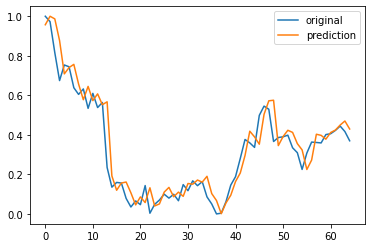

In [42]:
plt.plot(testY)
plt.plot(net(testX_tensor).data.numpy())
plt.legend(['original', 'prediction'])
plt.show()

Sequence to Sequence model

In [43]:
# main reference
# https://pytorch.org/tutorials/intermediate/seq2seq_translation_tutorial.html
import torch
import torch.optim as optim
import torch.nn as nn

import random

In [44]:
torch.manual_seed(0)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device = 'cpu'

In [45]:
raw = ["I feel hungry.	나는 배가 고프다.",
       "Pytorch is very easy.	파이토치는 매우 쉽다.",
       "Pytorch is a framework for deep learning.	파이토치는 딥러닝을 위한 프레임워크이다.",
       "Pytorch is very clear to use.	파이토치는 사용하기 매우 직관적이다."]

In [46]:
# fix token for 'start of sentence' and 'end of sentence'
SOS_token = 0
EOS_token = 1

In [47]:
# class for vocabulary related information of data
class Vocab:
    def __init__(self):
        self.vocab2index = {'<SOS>' : SOS_token, '<EOS>':EOS_token}
        self.index2vocab = {SOS_token:'<SOS>', EOS_token:'<EOS>'}
        self.vocab_count = {}
        self.n_vocab = len(self.vocab2index)
        
    def add_vocab(self, sentence):
        for word in sentence.split(' '):
            if word not in self.vocab2index:
                self.vocab2index[word] = self.n_vocab
                self.vocab_count[word] = 1
                self.index2vocab[self.n_vocab] = word
                self.n_vocab += 1
            else:
                self.vocab_count[word] += 1

In [48]:
# filter out the long sentence from source and target data
def filter_pair(pair, source_max_length, target_max_length):
    return len(pair[0].split(" ")) < source_max_length and len(pair[1].split(" ")) < target_max_length

In [49]:
# read and preprocess the corpus data
def preprocess(corpus, source_max_length, target_max_length):
    print('reading corpus...')
    pairs = []
    for line in corpus:
        pairs.append([s for s in line.strip().lower().split('\t')])
    print('Read {} sentence pairs'.format(len(pairs)))
    
    pairs = [pair for pair in pairs if filter_pair(pair, source_max_length, target_max_length)]
    print("Trimmed to {} sentence pairs".format(len(pairs)))
    
    source_vocab = Vocab()
    target_vocab = Vocab()
    
    print('Counting words...')
    for pair in pairs:
        source_vocab.add_vocab(pair[0])
        target_vocab.add_vocab(pair[1])
    print('source vocab size =', source_vocab.n_vocab)
    print('target vocab size =', target_vocab.n_vocab)
    
    return pairs, source_vocab, target_vocab

In [50]:
# declare simple encoder
class Encoder(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(Encoder, self).__init__()
        self.hidden_size = hidden_size
        self.embedding = nn.Embedding(input_size, hidden_size)
        self.gru = nn.GRU(hidden_size, hidden_size)
        
    def forward(self, x, hidden):
        x = self.embedding(x).view(1, 1, -1)
        x, hidden = self.gru(x, hidden)
        return x, hidden

In [51]:
# declare simple decoder
class Decoder(nn.Module):
    def __init__(self, hidden_size, output_size):
        super(Decoder, self).__init__()
        self.hidden_size = hidden_size
        self.embedding = nn.Embedding(output_size, hidden_size)
        self.gru = nn.GRU(hidden_size, hidden_size)
        self.out = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)
        
    def forward(self, x, hidden):
        x = self.embedding(x).view(1, 1, -1)
        x, hidden = self.gru(x, hidden)
        x = self.softmax(self.out(x[0]))
        return x, hidden

In [52]:
# convert sentence to the index tensor
def tensorize(vocab, sentence):
    indexes = [vocab.vocab2index[word] for word in sentence.split(' ')]
    indexes.append(vocab.vocab2index['<EOS>'])
    return torch.Tensor(indexes).long().to(device).view(-1, 1)

In [53]:
# training seq2seq
def train(pairs, source_vocab, target_vocab, encoder, decoder, n_iter, 
         print_every=1000, learning_rate=0.01):
    loss_total = 0
    
    encoder_optimizer = optim.SGD(encoder.parameters(), lr=learning_rate)
    decoder_optimizer = optim.SGD(decoder.parameters(), lr=learning_rate)
    
    training_batch = [random.choice(pairs) for _ in range(n_iter)]
    training_source = [tensorize(source_vocab, pair[0]) for pair in training_batch]
    training_target = [tensorize(target_vocab, pair[1]) for pair in training_batch]
    
    criterion = nn.NLLLoss()
    
    for i in range(1, n_iter + 1):
        source_tensor = training_source[i - 1]
        target_tensor = training_target[i - 1]
        
        encoder_hidden = torch.zeros([1, 1, encoder.hidden_size]).to(device)
        
        encoder_optimizer.zero_grad()
        decoder_optimizer.zero_grad()
        
        source_length = source_tensor.size(0)
        target_length = target_tensor.size(0)
        
        loss = 0
        
        for enc_input in range(source_length):
            _, encoder_hidden  = encoder(source_tensor[enc_input], encoder_hidden)
        
        decoder_input = torch.Tensor([[SOS_token]]).long().to(device)
        decoder_hidden = encoder_hidden # connect encoder output to decoder input
        
        for di in range(target_length):
            decoder_output, decoder_hidden = decoder(decoder_input, decoder_hidden)
            loss += criterion(decoder_output, target_tensor[di])
            decoder_input = target_tensor[di] # teacher forcing
            
        loss.backward()
        
        encoder_optimizer.step()
        decoder_optimizer.step()
        
        loss_iter = loss.item() / target_length
        loss_total += loss_iter
        
        if i % print_every == 0:
            loss_avg = loss_total / print_every
            loss_total = 0
            print('[{} - {}%] loss = {:05.4f}'.format(
            i, i/n_iter*100, loss_avg))

In [54]:
# insert given sentence to check the training
def evaluate(pairs, source_vocab, target_vocab, encoder, decoder, target_max_length):
    for pair in pairs:
        print('>', pair[0])
        print('=', pair[1])
        source_tensor = tensorize(source_vocab, pair[0])
        source_length = source_tensor.size()[0]
        encoder_hidden = torch.zeros([1, 1, encoder.hidden_size]).to(device)
        
        for ei in range(source_length):
            _, encoder_hidden = encoder(source_tensor[ei], encoder_hidden)
        
        decoder_input = torch.Tensor([[SOS_token]], device=device).long()
        decoder_hidden = encoder_hidden
        decoded_words = []
        
        for di in range(target_max_length):
            decoder_output, decoder_hidden = decoder(decoder_input, decoder_hidden)
            _, top_index = decoder_output.data.topk(1)
            if top_index.item() == EOS_token:
                decoded_words.append('<EOS>')
                break
            else:
                decoded_words.append(target_vocab.index2vocab[top_index.item()])
                
            decoder_input = top_index.squeeze().detach()
        
        predict_words = decoded_words
        predict_sentence = ' '.join(predict_words)
        print('<', predict_sentence)
        print('')

In [55]:
# declare max length for sentence
SOURCE_MAX_LENGTH = 10
TARGET_MAX_LENGTH = 12

In [56]:
# preprocess the corpus
load_pairs, load_source_vocab, load_target_vocab = preprocess(
    raw, SOURCE_MAX_LENGTH, TARGET_MAX_LENGTH)

reading corpus...
Read 4 sentence pairs
Trimmed to 4 sentence pairs
Counting words...
source vocab size = 17
target vocab size = 13


In [57]:
# declare the encoder and the decoder
enc_hidden_size = 16
dec_hidden_size = enc_hidden_size
enc = Encoder(load_source_vocab.n_vocab, enc_hidden_size).to(device)
dec = Decoder(dec_hidden_size, load_target_vocab.n_vocab).to(device)

In [58]:
# train seq2seq model
train(load_pairs, load_source_vocab, load_target_vocab, enc, dec, 5000, print_every=1000)

[1000 - 20.0%] loss = 0.7338
[2000 - 40.0%] loss = 0.1047
[3000 - 60.0%] loss = 0.0339
[4000 - 80.0%] loss = 0.0183
[5000 - 100.0%] loss = 0.0125


In [59]:
# check the model with given data
evaluate(load_pairs, load_source_vocab, load_target_vocab, enc, dec, TARGET_MAX_LENGTH)

> i feel hungry.
= 나는 배가 고프다.
< 나는 배가 고프다. <EOS>

> pytorch is very easy.
= 파이토치는 매우 쉽다.
< 파이토치는 매우 쉽다. <EOS>

> pytorch is a framework for deep learning.
= 파이토치는 딥러닝을 위한 프레임워크이다.
< 파이토치는 딥러닝을 위한 프레임워크이다. <EOS>

> pytorch is very clear to use.
= 파이토치는 사용하기 매우 직관적이다.
< 파이토치는 사용하기 매우 직관적이다. <EOS>



In [64]:
import torch
import numpy as np
from torch.nn.utils.rnn import pad_sequence, pack_sequence
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence

In [65]:
# Random word from random word generator
# batch size = 5, max length sequence = 13
data = ['hello world',
        'midnight',
        'calculation',
        'path',
        'short circuit']

# Make dictionary
# Get all characters and include pad token
char_set = ['<pad>'] + list(set(char for seq in data for char in seq))

# Construct character to index dictionary
char2idx = {char:idx for idx, char in enumerate(char_set)}

In [66]:
# Convert character to index and make list to tensors.
X = [torch.LongTensor([char2idx[char] for char in seq]) for seq in data]

# Check converted result
for sequence in X:
    print(sequence)

tensor([ 4, 13, 18, 18,  2, 15, 10,  2, 14, 18,  1])
tensor([12, 16,  1,  8, 16,  7,  4,  5])
tensor([ 3,  9, 18,  3,  6, 18,  9,  5, 16,  2,  8])
tensor([11,  9,  5,  4])
tensor([17,  4,  2, 14,  5, 15,  3, 16, 14,  3,  6, 16,  5])


In [67]:
# Make length tensor (will be used later in 'pack_padded_sequence' function)
lengths = [len(seq) for seq in X]
print('lengths:',lengths)

lengths: [11, 8, 11, 4, 13]


# Sequence 데이터를 batch로 묶을때  
 text나 audio처럼 sequence 한 데이터의 경우 길이가 각각 다르기 때문에  
하나의 batch로 만들어주기 위해서 일반적으로 제일 긴 sequence 길이에 맞춰  
뒷 부분에 padding을 추가함. 이는 일반적으로 많이 쓰임.  
 하지만 PackedSequence 를 쓰면 padding 없이도 정확히 필요한 부분까지만  
병렬 계산 가능함

PaddedSequence는 sequence중에서 가장 긴 sequence와 길이를 맞추기 위해 padding을  
추가한 일반적인 Tensor임.  
input이 Tensor들의 list로 주어져야 함. list 안에 있는 각각의 Tensor의 shape이  
(?, a, b, ...)라고 할 때, (?는 각각 다른 sequence length) pad_sequence 함수는  
(T, batch_size, a, b, ...) shape를 가지는 Tensor가 리턴됨. (여기서 T는 batch 안에서  
가장 큰 sequence length 임)  
만약, pad_sequence에 명시적으로 batch_first=True 라는 파라미터를 지정해주면,  
(batch_size, T, a, b, ...) shape을 가지는 Tensor가 리턴됨

In [68]:
# Make a Tensor of shape (Batch x Maximum_Sequence_Length)
padded_sequence = pad_sequence(X, batch_first=True) # X is now padded sequence
print(padded_sequence)
print(padded_sequence.shape)

tensor([[ 4, 13, 18, 18,  2, 15, 10,  2, 14, 18,  1,  0,  0],
        [12, 16,  1,  8, 16,  7,  4,  5,  0,  0,  0,  0,  0],
        [ 3,  9, 18,  3,  6, 18,  9,  5, 16,  2,  8,  0,  0],
        [11,  9,  5,  4,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [17,  4,  2, 14,  5, 15,  3, 16, 14,  3,  6, 16,  5]])
torch.Size([5, 13])


# pack_sequence 함수를 이용하여 PackedSequence 만들기
- PackedSequence는 위와 같이 padding token을 추가하여 sequence의 최대 길이에 맞는 Tensor를 만드는게 아닌, padding을 추가하지 않고 정확히 주어진 sequence 길이까지만 모델이 연산을 하게끔 만드는 pytorch의 자료구조임.  
- 단, 주어지는 input (list of Tensor)은 길이에 따른 내림차순으로 정렬 되어야 함

In [69]:
# Sort by descending lengths
sorted_idx = sorted(range(len(lengths)), key=lengths.__getitem__, reverse=True)
sorted_X = [X[idx] for idx in sorted_idx]

# check converted result
for sequence in sorted_X:
    print(sequence)

tensor([17,  4,  2, 14,  5, 15,  3, 16, 14,  3,  6, 16,  5])
tensor([ 4, 13, 18, 18,  2, 15, 10,  2, 14, 18,  1])
tensor([ 3,  9, 18,  3,  6, 18,  9,  5, 16,  2,  8])
tensor([12, 16,  1,  8, 16,  7,  4,  5])
tensor([11,  9,  5,  4])


In [70]:
# pack_sequence를 이용하여 PackedSequence 만들기
packed_sequence = pack_sequence(sorted_X)
print(packed_sequence)

PackedSequence(data=tensor([17,  4,  3, 12, 11,  4, 13,  9, 16,  9,  2, 18, 18,  1,  5, 14, 18,  3,
         8,  4,  5,  2,  6, 16, 15, 15, 18,  7,  3, 10,  9,  4, 16,  2,  5,  5,
        14, 14, 16,  3, 18,  2,  6,  1,  8, 16,  5]), batch_sizes=tensor([5, 5, 5, 5, 4, 4, 4, 4, 3, 3, 3, 1, 1]), sorted_indices=None, unsorted_indices=None)


Embedding 적용하기   
- RNN에 input으로 넣어서 테스트
- 위 예제들은 input이 character의 index들을 가지고 있었지만, 보통은 주로 이를 embedding 한 값을 RNN의 input으로 넣어줌
- one-hot character embedding을 적용

In [71]:
# one-hot embedding using PaddedSequence
eye = torch.eye(len(char_set)) # Identity matrix of shape (len(char_set), len(char_Set))
embedded_tensor = eye[padded_sequence]

# shape : (Batch_size, max_sequence_length, number_of_input_tokens)
print(embedded_tensor.shape) 

torch.Size([5, 13, 19])


In [75]:
# one-hot embedding using PackedSequence
embedded_packed_seq = pack_sequence([eye[X[idx]] for idx in sorted_idx])
print(embedded_packed_seq.data.shape)

torch.Size([47, 19])


In [76]:
# declare RNN
rnn = torch.nn.RNN(input_size=len(char_set), hidden_size=30, batch_first=True)

In [77]:
# PaddedSequence 이용
rnn_output, hidden = rnn(embedded_tensor)
print(rnn_output.shape) # shape : (batch_size, max_seq_length, hidden_size)
print(hidden.shape) # shape : (num_layers * num_directions, batch_size, hidden_size)

torch.Size([5, 13, 30])
torch.Size([1, 5, 30])


In [78]:
# PackedSequence 이용
rnn_output, hidden = rnn(embedded_packed_seq)
print(rnn_output.data.shape)
print(hidden.data.shape)

torch.Size([47, 30])
torch.Size([1, 5, 30])


pad_packed_sequence  
PackedSequence -> PaddedSequence(Tensor)로 바꿔주는 함수  
return : (Tensor, list_of_lengths)

In [79]:
unpacked_sequence, seq_lengths = pad_packed_sequence(
    embedded_packed_seq, batch_first=True)
print(unpacked_sequence.shape)
print(seq_lengths)

torch.Size([5, 13, 19])
tensor([13, 11, 11,  8,  4])


pack_padded_sequence  
PaddedSequence -> PackedSequence 로 바꿔주는 함수  
pack_padded_sequence 함수는 실제 sequence 길이에 대한 정보를 모르기 때문에,  
파라미터로 꼭 제공해줘야 함  
input인 PaddedSequence 가 아까 언급드린 길이에 따른 내림차순으로 정렬되어야 함

In [80]:
embedded_padded_sequence = eye[pad_sequence(sorted_X, batch_first=True)]
print(embedded_padded_sequence.shape)

torch.Size([5, 13, 19])


In [83]:
# padding이 된 Tensor를 PackedSequence 로 변환
sorted_lengths = sorted(lengths, reverse=True)
new_packed_sequence = pack_padded_sequence(
    embedded_padded_sequence, sorted_lengths, batch_first=True)
print(new_packed_sequence.data.shape)
print(new_packed_sequence.data)

torch.Size([47, 19])
tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
         0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
         0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
         0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
         0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
         0.],
        [0., 0., 1., 0., 0., 